# ICFES Data Analysis

The test used to measure the quality of undergraduate education in Colombia is named "Saber - Pro". This test was used to evaluate post-secondary education from 2003.

This test measures generic competencies, such as quantitative reasoning, critical lecture, writing communication, English, and citizen competencies. And specific competencies for the career of the student.

The ICFES shares this information, related to personal, academic, and socioeconomic information in order to propose ways to enhance the post-secondary education quality in the country.

The public information shared by the institute can be found here.
https://www.icfes.gov.co/data-icfes

Therefore I will analyze the data related to this exam in order to develop a model that predict the test results based on the prediction variables.


In [57]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A Look at the Data

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [2]:
#Load information 
Data2022_2 = pd.read_csv('DATA_ICFES_SABERPROPROFESIONAL_2022-2.TXT',error_bad_lines=False,delimiter='¬')

C:\Users\Andrea\AppData\Local\Temp\ipykernel_1824\954946105.py:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  Data2022_2 = pd.read_csv('DATA_ICFES_SABERPROPROFESIONAL_2022-2.TXT',error_bad_lines=False,delimiter='¬')
C:\Users\Andrea\AppData\Local\Temp\ipykernel_1824\954946105.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Data2022_2 = pd.read_csv('DATA_ICFES_SABERPROPROFESIONAL_2022-2.TXT',error_bad_lines=False,delimiter='¬')


**1.** Number of rows and columns.

In [3]:
print ("2022_2:" + str(Data2022_2.shape))

2022_2:(127342, 109)


**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [4]:
print (Data2022_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127342 entries, 0 to 127341
Columns: 109 entries, ESTU_TIPODOCUMENTO to ESTU_ESTADOINVESTIGACION
dtypes: float64(11), int64(28), object(70)
memory usage: 105.9+ MB
None


In [5]:
print(Data2022_2.head())

  ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                 CE           ECUADOR           M           24/12/1998   
1                 CC          COLOMBIA           F           11/09/2001   
2                 CC          COLOMBIA           M           10/09/2001   
3                 CC          COLOMBIA           F           16/03/1993   
4                 CC          COLOMBIA           M           26/06/1996   

  ESTU_EXTERIOR  PERIODO ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0            NO    20225   EK202250120952      ESTUDIANTE          ECUADOR   
1            NO    20225   EK202250088428      ESTUDIANTE         COLOMBIA   
2            NO    20225   EK202250166006      ESTUDIANTE         COLOMBIA   
3            NO    20225   EK202250101378      ESTUDIANTE         COLOMBIA   
4            NO    20225   EK202250179845      ESTUDIANTE         COLOMBIA   

  ESTU_TIENEETNIA  ... MOD_COMUNI_ESCRITA_DESEM  MOD_COMUNI_ESCRITA_PNAL  \
0   

In [6]:
most_missing_cols = []
for i in Data2022_2.columns:
    if Data2022_2[i].isnull().sum()/len(Data2022_2[i])>0.75:
        most_missing_cols.append(i)

In [7]:
most_missing_cols

['ESTU_OTROCOLE_TERMINO',
 'ESTU_CURSODOCENTESIES',
 'ESTU_CURSOIESAPOYOEXTERNO',
 'ESTU_CURSOIESEXTERNA',
 'ESTU_SIMULACROTIPOICFES',
 'ESTU_ACTIVIDADREFUERZOAREAS',
 'ESTU_ACTIVIDADREFUERZOGENERIC',
 'ESTU_OTROPLANTEL',
 'ESTU_PREGRADOEXAMENSP',
 'ESTU_UNPOSTGRADO']

I will not use the columns with more than 75% of missing values.

In [8]:
Data2022_2.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,CE,ECUADOR,M,24/12/1998,NO,20225,EK202250120952,ESTUDIANTE,ECUADOR,No,...,3.0,81,82,174,86,86,52.304299,2.0,3,PUBLICAR
1,CC,COLOMBIA,F,11/09/2001,NO,20225,EK202250088428,ESTUDIANTE,COLOMBIA,No,...,3.0,74,76,152,59,76,57.241157,3.0,2,PUBLICAR
2,CC,COLOMBIA,M,10/09/2001,NO,20225,EK202250166006,ESTUDIANTE,COLOMBIA,No,...,3.0,76,82,151,59,72,48.394707,2.0,2,PUBLICAR
3,CC,COLOMBIA,F,16/03/1993,NO,20225,EK202250101378,ESTUDIANTE,COLOMBIA,No,...,2.0,28,29,122,19,31,34.324772,1.0,4,PUBLICAR
4,CC,COLOMBIA,M,26/06/1996,NO,20225,EK202250179845,ESTUDIANTE,COLOMBIA,No,...,1.0,14,10,134,34,13,42.049505,1.0,2,PUBLICAR


In [9]:
Data2022_2.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_EXTERIOR', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       ...
       'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL',
       'MOD_COMUNI_ESCRITA_PNBC', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL',
       'PERCENTIL_NBC', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
       'ESTU_NSE_IES', 'ESTU_ESTADOINVESTIGACION'],
      dtype='object', length=109)

In [10]:
df=Data2022_2[['ESTU_GENERO','ESTU_TIENEETNIA','ESTU_DEPTO_RESIDE','ESTU_ESTADOCIVIL'
               ,'ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_PAGOMATRICULABECA','ESTU_COMOCAPACITOEXAMENSB11'
               ,'ESTU_SEMESTRECURSA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_OCUPACIONPADRE','FAMI_OCUPACIONMADRE'
               ,'FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR','FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENESERVICIOTV'
               ,'FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS','FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE'
               ,'ESTU_PLANTELEDUCATIVO','ESTU_HORASSEMANATRABAJA','ESTU_PAGOMATRICULA'
               ,'ESTU_VLRULTIMOSEMESCURSADO','ESTU_PRESENTACIONCASA','INST_NOMBRE_INSTITUCION'
               ,'GRUPOREFERENCIA','ESTU_PRGM_CODMUNICIPIO','ESTU_NIVEL_PRGM_ACADEMICO','ESTU_METODO_PRGM','ESTU_NUCLEO_PREGRADO','INST_CARACTER_ACADEMICO','ESTU_PRIVADO_LIBERTAD'
               ,'PUNT_GLOBAL']]

In [11]:
df.head()

,ESTU_GENERO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_ESTADOCIVIL,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,ESTU_PRESENTACIONCASA,INST_NOMBRE_INSTITUCION,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,INST_CARACTER_ACADEMICO,ESTU_PRIVADO_LIBERTAD,PUNT_GLOBAL
0,M,No,BOGOTÁ,Soltero,Entre 1 millón y menos de 2.5 millones,No,Repasó por cuenta propia,08,Secundaria (Bachillerato) completa,Educación profesional completa,...,Si,UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOTÁ D.C.,ARQUITECTURA Y URBANISMO,11001,UNIVERSITARIO,PRESENCIAL,ARQUITECTURA,UNIVERSIDAD,N,174
1,F,No,SUCRE,Soltero,Entre 2.5 millones y menos de 4 millones,No,Tomó un curso de preparación,08,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,...,No,CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-S...,CIENCIAS SOCIALES,70001,UNIVERSITARIO,PRESENCIAL,"SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES",INSTITUCIÓN UNIVERSITARIA,N,152
2,M,No,CUNDINAMARCA,Soltero,Entre 1 millón y menos de 2.5 millones,No,Repasó por cuenta propia,08,Primaria incompleta,Secundaria (Bachillerato) incompleta,...,Si,FUNDACION UNIVERSITARIA DEL AREA ANDINA-BOGOTÁ...,ADMINISTRACIÓN Y AFINES,11001,UNIVERSITARIO,DISTANCIA VITUAL,ADMINISTRACIÓN,INSTITUCIÓN UNIVERSITARIA,N,151
3,F,No,PUTUMAYO,Unión libre,Entre 500 mil y menos de 1 millón,No,Tomó un curso de preparación,11,Ninguno,Ninguno,...,Si,UNIVERSIDAD PONTIFICIA BOLIVARIANA-MEDELLIN,CIENCIAS SOCIALES,86749,UNIVERSITARIO,DISTANCIA,"SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES",UNIVERSIDAD,N,122
4,M,No,ANTIOQUIA,Soltero,No pagó matrícula,Si,No realizó ninguna prueba de preparación,12 o más,Primaria incompleta,Secundaria (Bachillerato) completa,...,No,UNIVERSIDAD DE ANTIOQUIA-MEDELLIN,INGENIERÍA,5001,UNIVERSITARIO,PRESENCIAL,INGENIERÍA QUÍMICA Y AFINES,UNIVERSIDAD,N,134


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127342 entries, 0 to 127341
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ESTU_GENERO                     127337 non-null  object 
 1   ESTU_TIENEETNIA                 126567 non-null  object 
 2   ESTU_DEPTO_RESIDE               127332 non-null  object 
 3   ESTU_ESTADOCIVIL                126762 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  125148 non-null  object 
 5   ESTU_PAGOMATRICULABECA          125091 non-null  object 
 6   ESTU_COMOCAPACITOEXAMENSB11     125273 non-null  object 
 7   ESTU_SEMESTRECURSA              125148 non-null  object 
 8   FAMI_EDUCACIONPADRE             122559 non-null  object 
 9   FAMI_EDUCACIONMADRE             122456 non-null  object 
 10  FAMI_OCUPACIONPADRE             125282 non-null  object 
 11  FAMI_OCUPACIONMADRE             125282 non-null  object 
 12  FAMI_ESTRATOVIVI

It appears that all the columns are object type. However, the target variable should be an ingerer. Therefore, I will change the data type of this variable.

In [13]:
df['PUNT_GLOBAL']=df['PUNT_GLOBAL'].apply(lambda x: float(x))

C:\Users\Andrea\AppData\Local\Temp\ipykernel_1824\1468015384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PUNT_GLOBAL']=df['PUNT_GLOBAL'].apply(lambda x: float(x))


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127342 entries, 0 to 127341
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ESTU_GENERO                     127337 non-null  object 
 1   ESTU_TIENEETNIA                 126567 non-null  object 
 2   ESTU_DEPTO_RESIDE               127332 non-null  object 
 3   ESTU_ESTADOCIVIL                126762 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  125148 non-null  object 
 5   ESTU_PAGOMATRICULABECA          125091 non-null  object 
 6   ESTU_COMOCAPACITOEXAMENSB11     125273 non-null  object 
 7   ESTU_SEMESTRECURSA              125148 non-null  object 
 8   FAMI_EDUCACIONPADRE             122559 non-null  object 
 9   FAMI_EDUCACIONMADRE             122456 non-null  object 
 10  FAMI_OCUPACIONPADRE             125282 non-null  object 
 11  FAMI_OCUPACIONMADRE             125282 non-null  object 
 12  FAMI_ESTRATOVIVI

## Data analysis

Now I wan to see the general behavior of the target variable "PUNT_GLOBAL"

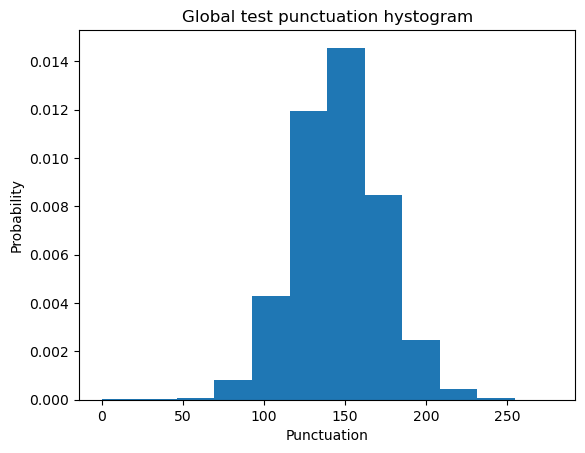

In [15]:
plt.hist(df['PUNT_GLOBAL'], bins=12, density=True)
plt.xlabel("Punctuation")
plt.ylabel("Probability")
plt.title("Global test punctuation hystogram")
plt.show()

In general, the scores round 150 points and it seems the general range of a score moves from 100 to 200 points.With somme exceptions that are as low as 0 points and the maximun that is 250 points.

Now, I want to see the relation between the target variable and the categorical variables.

In [16]:
cat_cols=df.select_dtypes(include=['object']).copy().columns
cat_cols

Index(['ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE',
       'ESTU_ESTADOCIVIL', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_PAGOMATRICULABECA', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_OCUPACIONPADRE', 'FAMI_OCUPACIONMADRE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA',
       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_PAGOMATRICULA', 'ESTU_VLRULTIMOSEMESCURSADO',
       'ESTU_PRESENTACIONCASA', 'INST_NOMBRE_INSTITUCION', 'GRUPOREFERENCIA',
       'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO',
       'INST_CARACTER_ACADEMICO', 'ESTU_PRIVADO_LIBERTAD'],
      dtype='object')

In [17]:
def barplot (df,cat_column,target_column):
    a=df[[cat_column,target_column]].groupby(cat_column).mean()
    x=a.plot(kind='bar')
    return x

C:\Users\Andrea\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


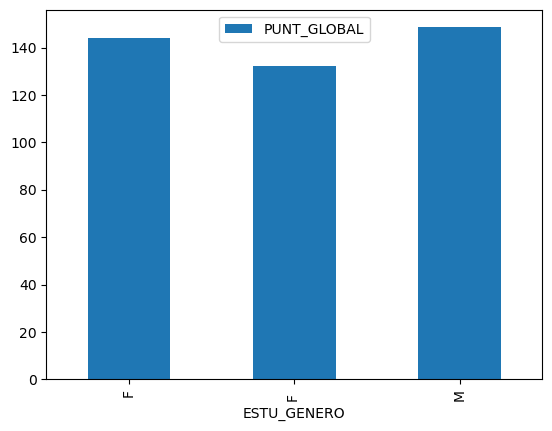

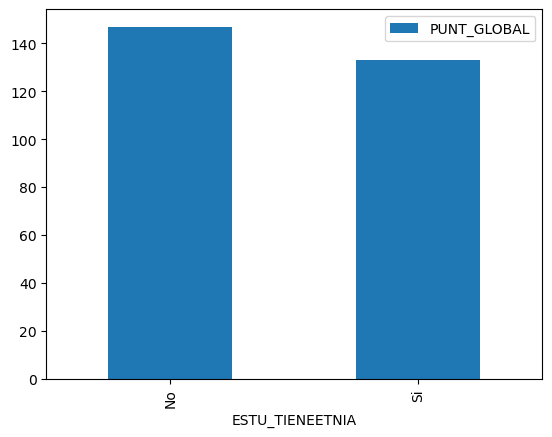

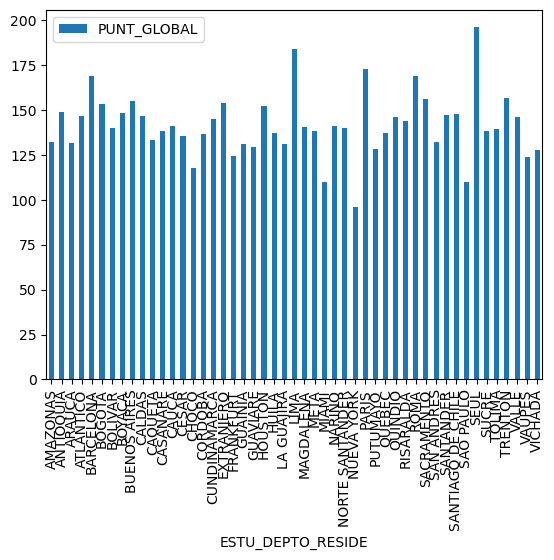

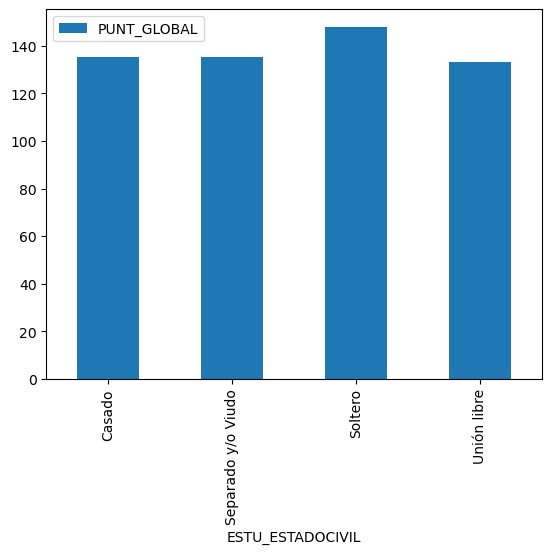

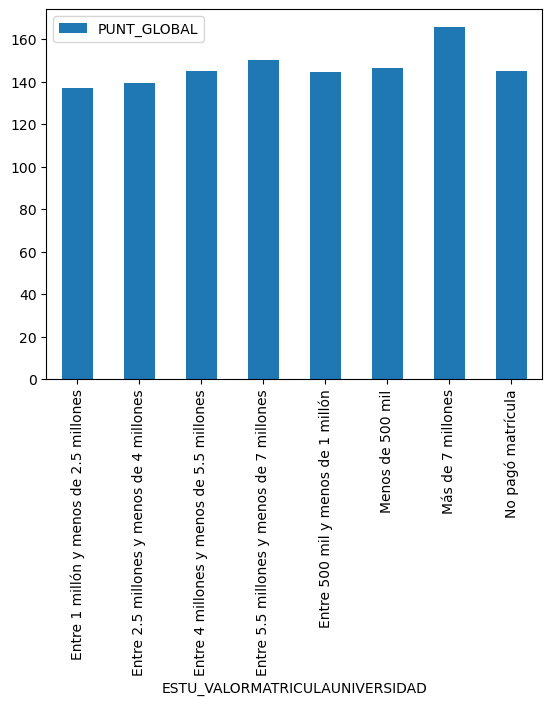

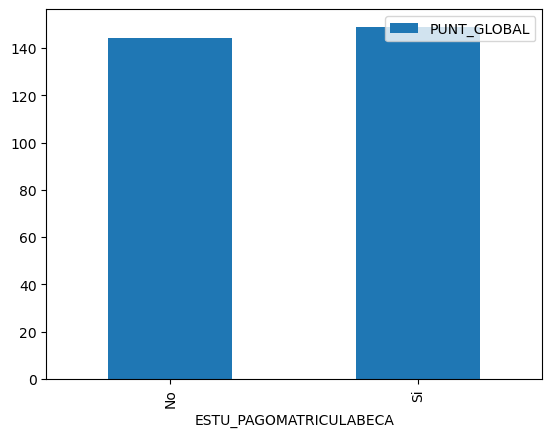

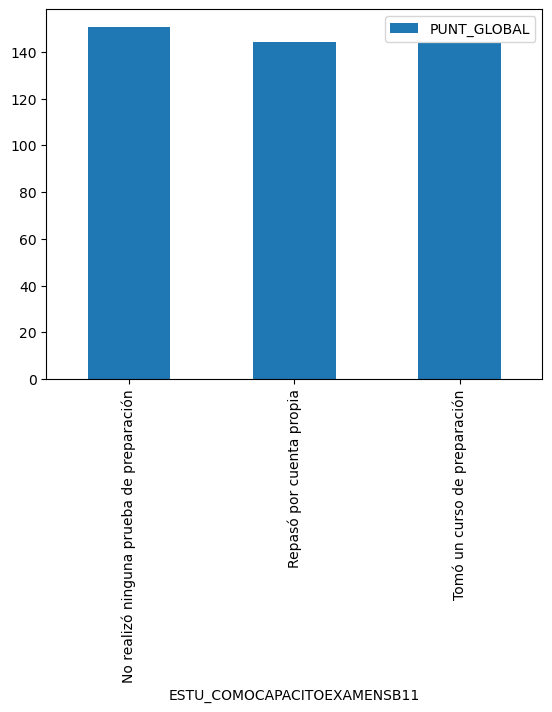

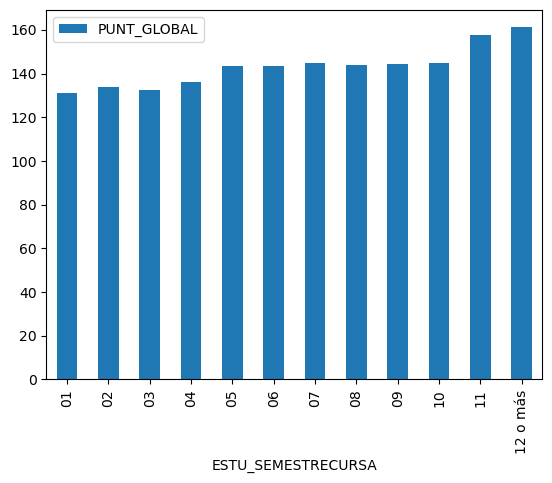

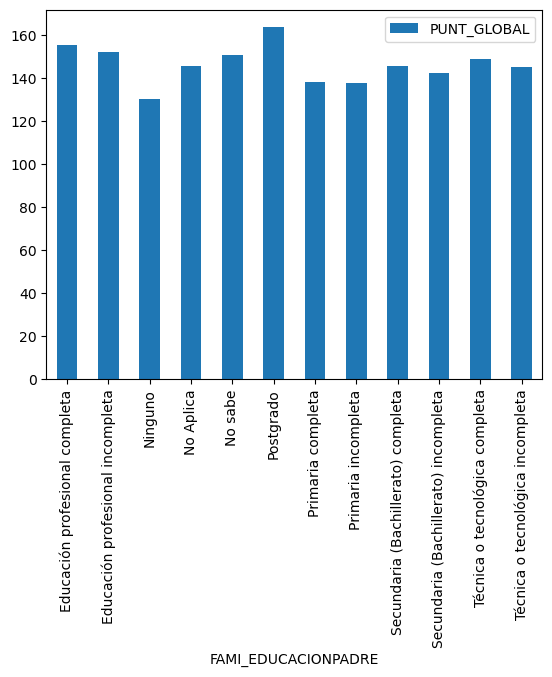

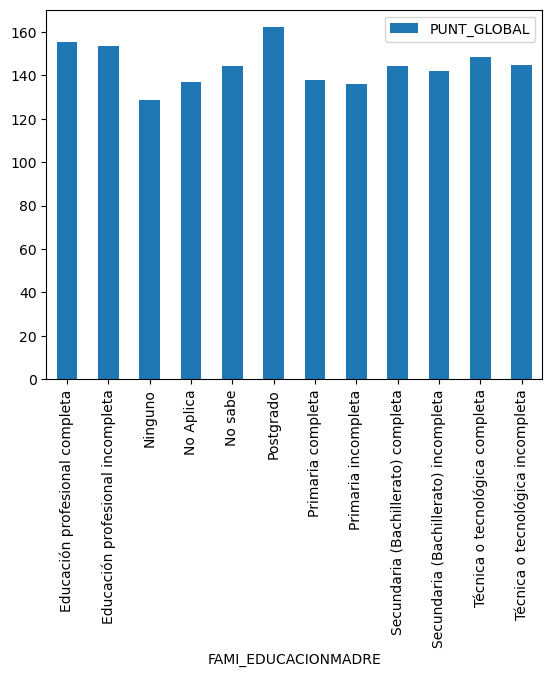

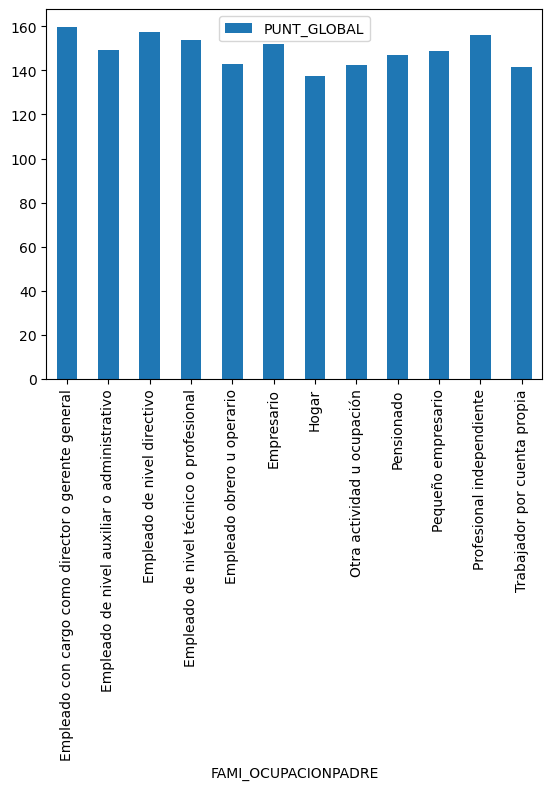

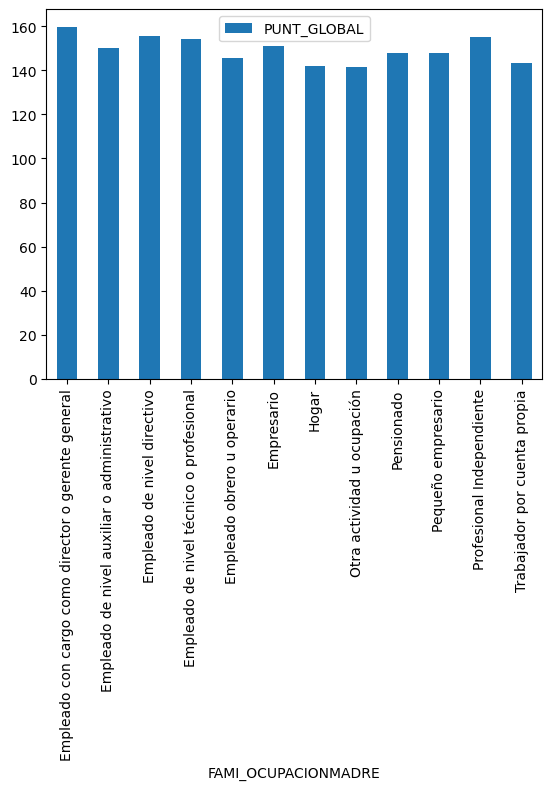

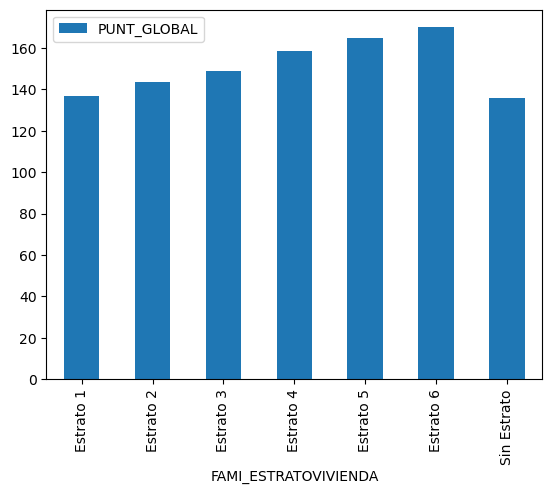

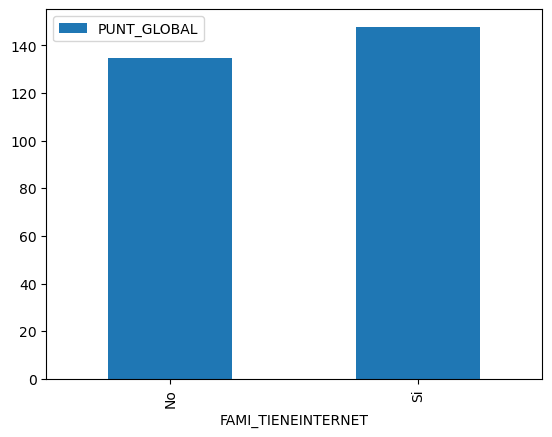

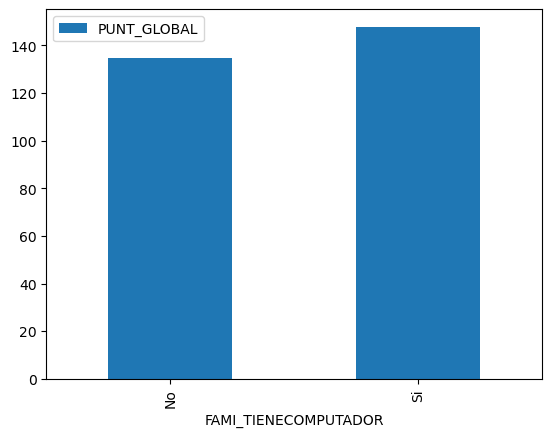

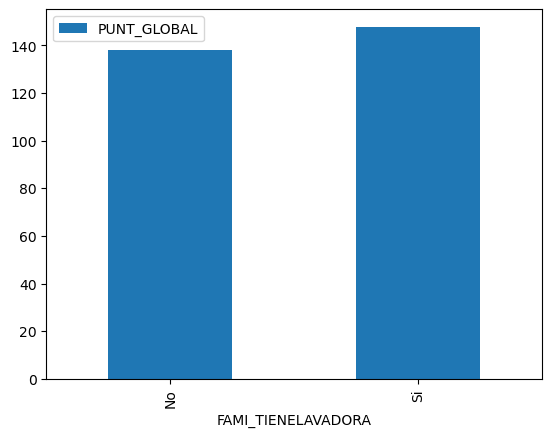

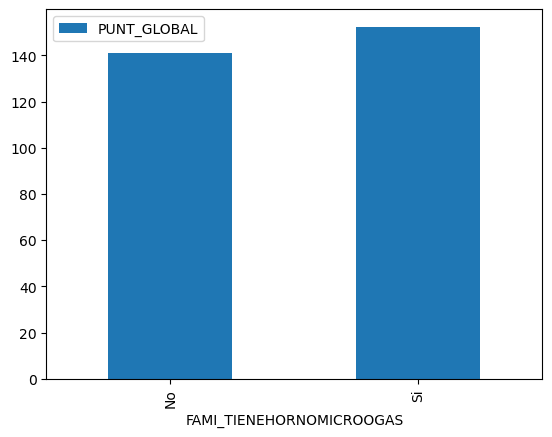

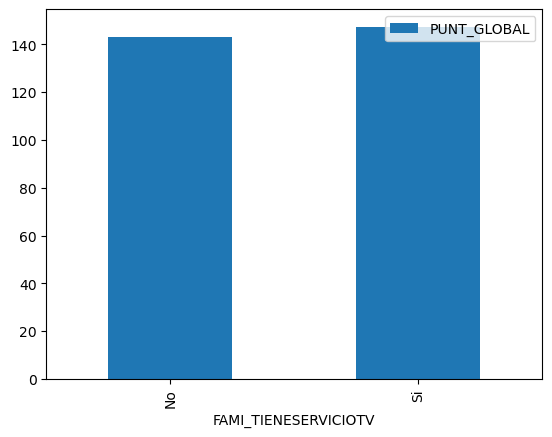

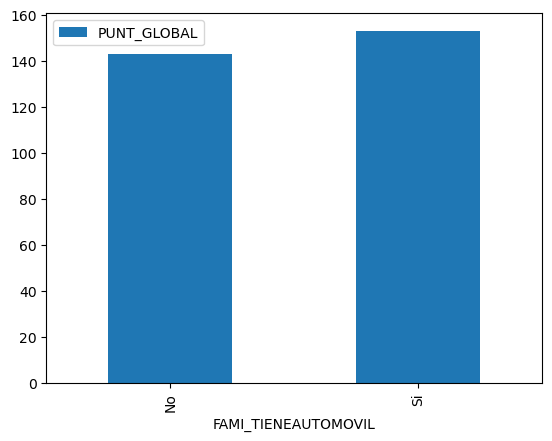

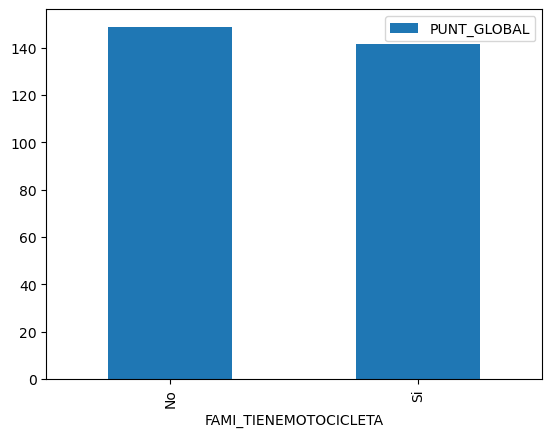

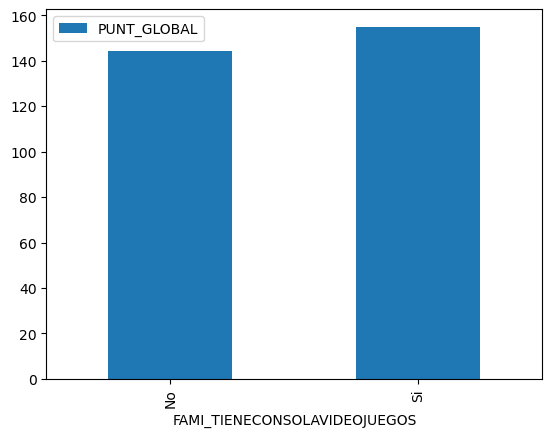

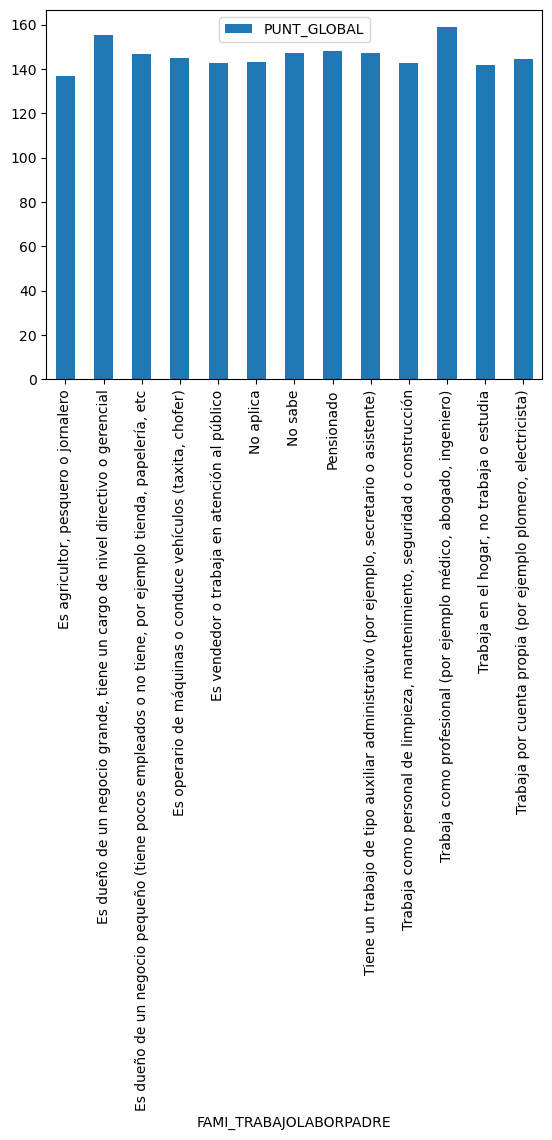

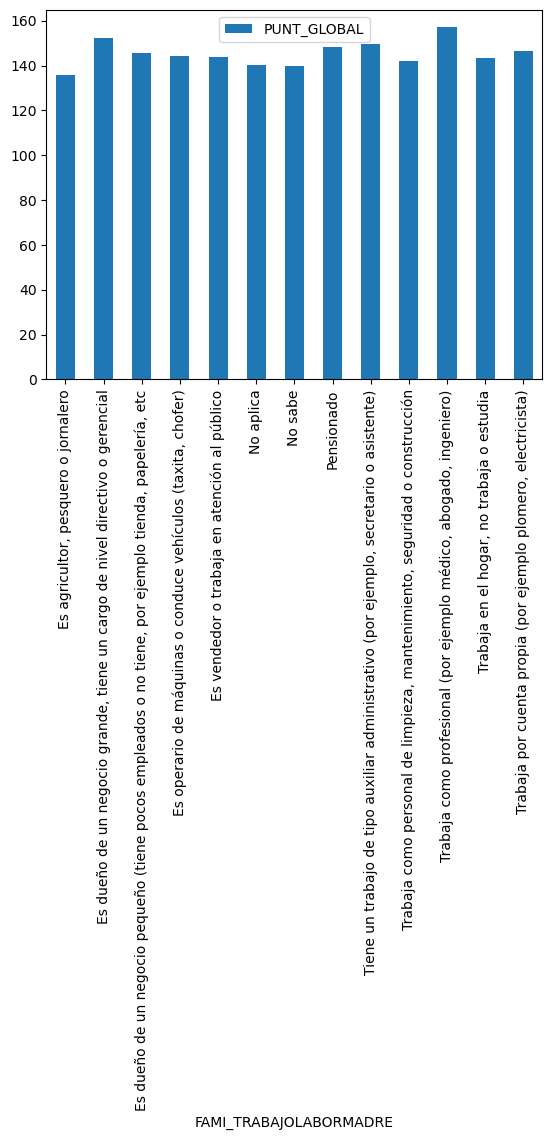

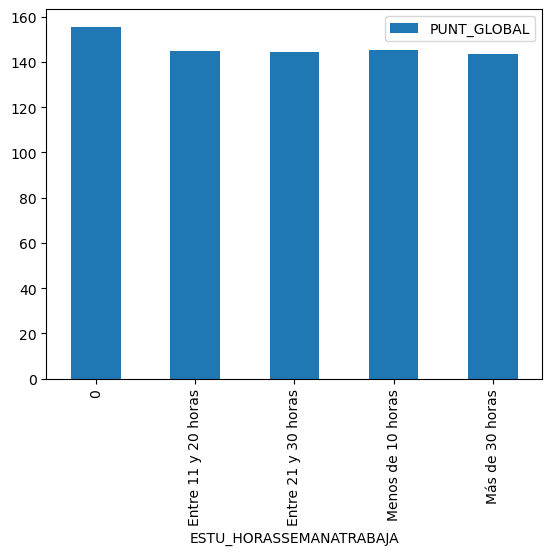

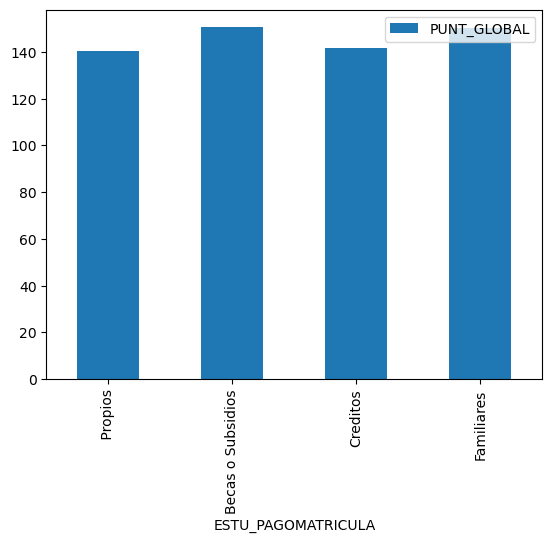

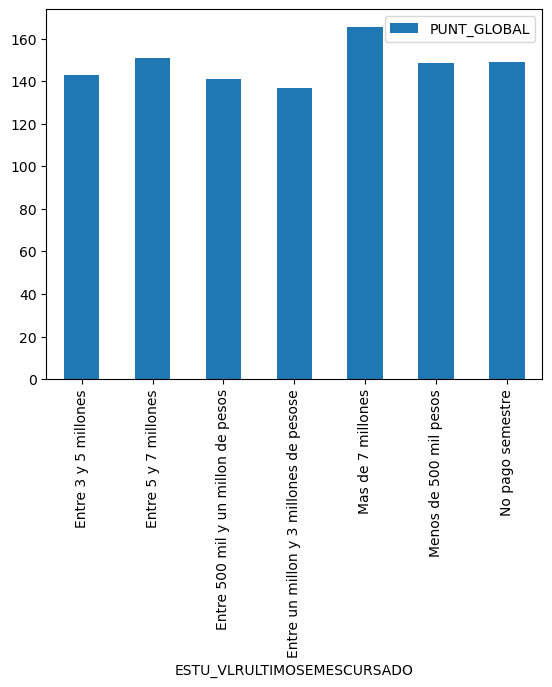

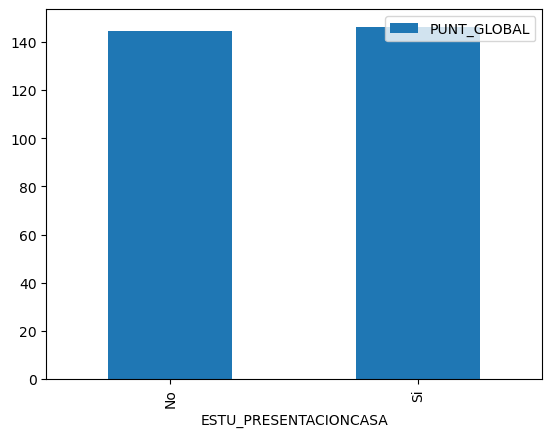

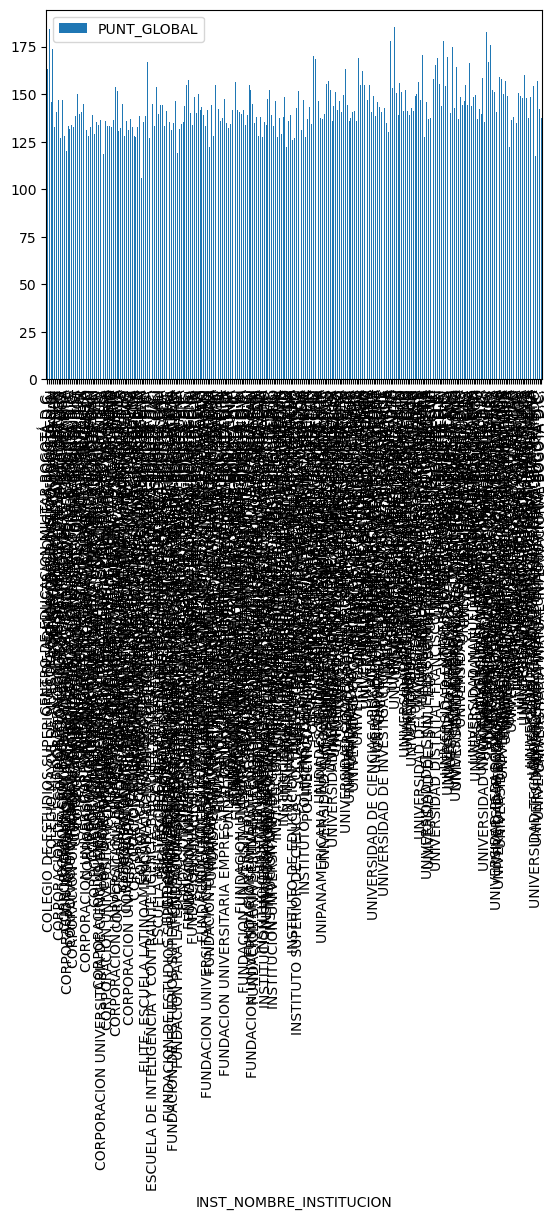

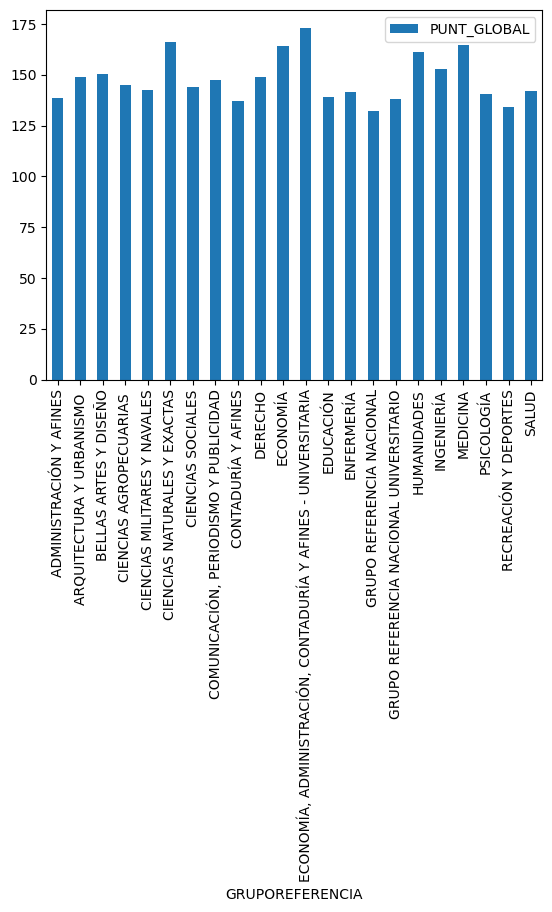

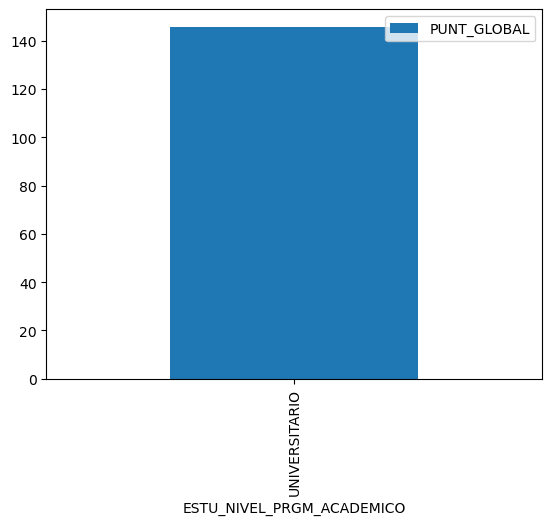

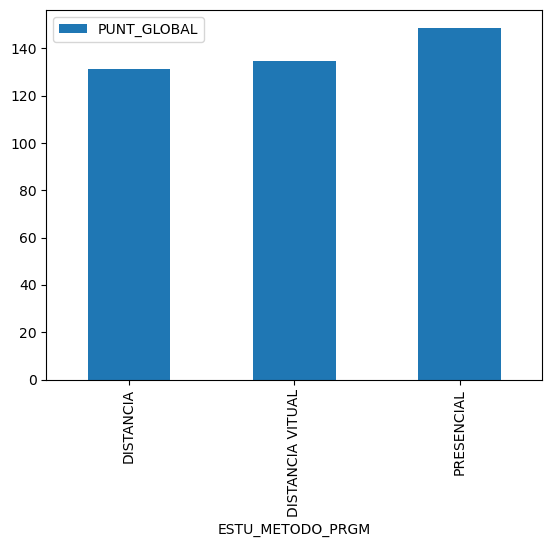

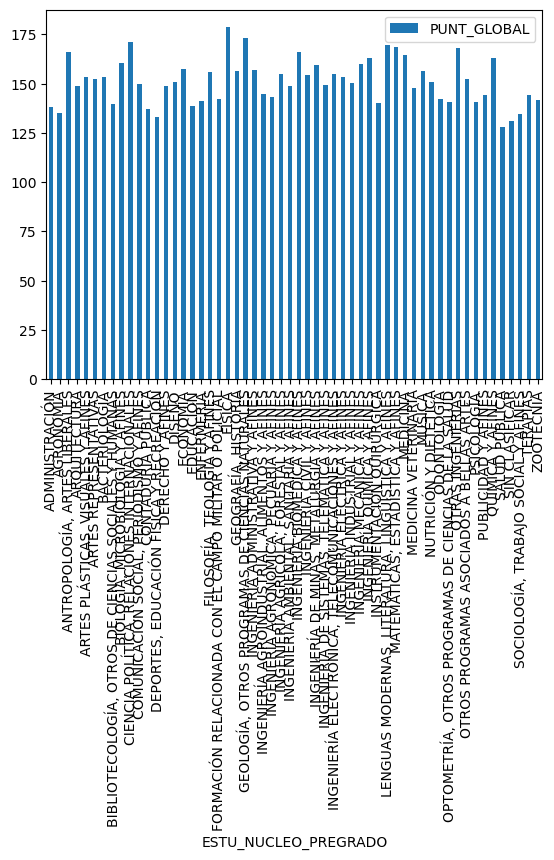

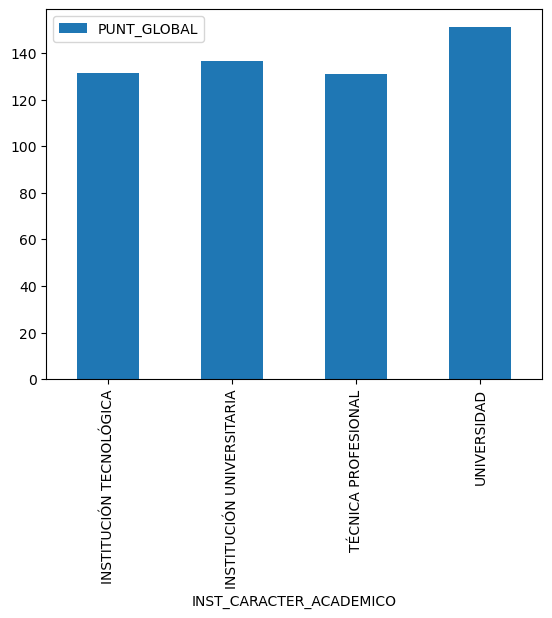

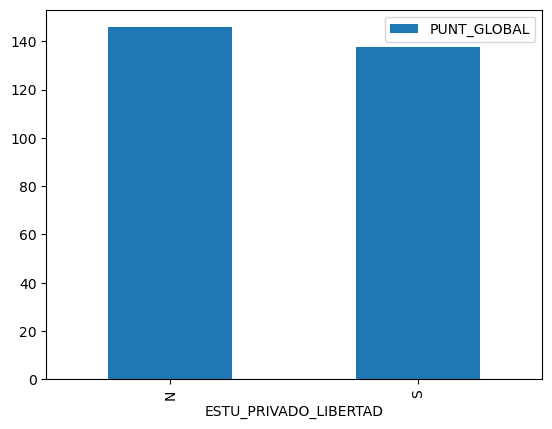

In [18]:
for i in cat_cols:
    barplot(df,i,'PUNT_GLOBAL')

There is only one class in STU_NIVEL_PRG_ACADEMICO therefore, this variable is not going to be taken into account to see the impact in the results. On the other hand, the other variables show a difference between the categories and the average results, even though it can be sligh. Therefore, the remaining variables are going to be included in the study.

## Data preparation

For the other variables, I will create dummies, so they can be used to predict the target variable and show correlations.

I will keep only the variables that seem to have an impact in the final score.

In [19]:
df.columns

Index(['ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE',
       'ESTU_ESTADOCIVIL', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_PAGOMATRICULABECA', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_OCUPACIONPADRE', 'FAMI_OCUPACIONMADRE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA',
       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'ESTU_PLANTELEDUCATIVO',
       'ESTU_HORASSEMANATRABAJA', 'ESTU_PAGOMATRICULA',
       'ESTU_VLRULTIMOSEMESCURSADO', 'ESTU_PRESENTACIONCASA',
       'INST_NOMBRE_INSTITUCION', 'GRUPOREFERENCIA', 'ESTU_PRGM_CODMUNICIPIO',
       'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO',
       'INST_CARACTER_ACADEMICO', 'ESTU_PRIVADO_LIBERTAD', 'PUNT_GLOBAL'

In [20]:
df2=df[['ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE',
       'ESTU_ESTADOCIVIL', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_PAGOMATRICULABECA', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_OCUPACIONPADRE', 'FAMI_OCUPACIONMADRE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA',
       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'ESTU_HORASSEMANATRABAJA', 'ESTU_PAGOMATRICULA',
       'ESTU_VLRULTIMOSEMESCURSADO', 'ESTU_PRESENTACIONCASA',
       'INST_NOMBRE_INSTITUCION', 'GRUPOREFERENCIA', 'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO',
       'INST_CARACTER_ACADEMICO', 'ESTU_PRIVADO_LIBERTAD', 'PUNT_GLOBAL']].copy()

In [21]:
cat_cols2=df2.select_dtypes(include=['object']).copy().columns

In [22]:
def create_dummy_df(df2, cat_cols2, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df2 = pd.concat([df2.drop(col, axis=1), pd.get_dummies(df2[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df2

In [23]:
df3 = create_dummy_df(df2,cat_cols2, dummy_na=True)

In [24]:
df3.head()

,PUNT_GLOBAL,ESTU_GENERO_F,ESTU_GENERO_M,ESTU_GENERO_nan,ESTU_TIENEETNIA_Si,ESTU_TIENEETNIA_nan,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BARCELONA,...,"ESTU_NUCLEO_PREGRADO_SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES",ESTU_NUCLEO_PREGRADO_TERAPIAS,ESTU_NUCLEO_PREGRADO_ZOOTECNIA,ESTU_NUCLEO_PREGRADO_nan,INST_CARACTER_ACADEMICO_INSTITUCIÓN UNIVERSITARIA,INST_CARACTER_ACADEMICO_TÉCNICA PROFESIONAL,INST_CARACTER_ACADEMICO_UNIVERSIDAD,INST_CARACTER_ACADEMICO_nan,ESTU_PRIVADO_LIBERTAD_S,ESTU_PRIVADO_LIBERTAD_nan
0,174.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,152.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,151.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,122.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,134.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Modeling

In [25]:
# get the train and test 
X=df3.drop(['PUNT_GLOBAL'], axis=1)
y=df3['PUNT_GLOBAL'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Linear model

In [27]:
# Define the model
Model = LinearRegression()
# Fit to the test set
Model.fit(X_train, y_train)
# Predict the target variable with the train and test set
y_train_preds = Model.predict(X_train)
y_test_preds = Model.predict(X_test)
# Get the MAE results for test and train
test_score = mean_absolute_error(y_test, y_test_preds)
train_score = mean_absolute_error(y_train, y_train_preds)
hiperparameters="None"

In [29]:
print (test_score)
print(train_score)

16778428.05430142
16.334081391448677


In [30]:
# Get the coefficient of each variable
coefficients = Model.coef_
variables=pd.DataFrame()
variables['Column']=X.columns
variables['Coefficient']=coefficients


# Sort the coefficients in descending order
variables.sort_values(by='Coefficient',inplace=True)

In [31]:
variables2=variables.head(10).append(variables.tail(10))

C:\Users\Andrea\AppData\Local\Temp\ipykernel_1824\3876291067.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variables2=variables.head(10).append(variables.tail(10))


In [32]:
variables2

,Column,Coefficient
82,ESTU_SEMESTRECURSA_nan,-1.350518e+12
442,INST_NOMBRE_INSTITUCION_UNIVERSIDAD PONTIFICIA...,-1.171394e+12
361,INST_NOMBRE_INSTITUCION_UNIVERSIDAD DE ANTIOQU...,-1.171394e+12
366,INST_NOMBRE_INSTITUCION_UNIVERSIDAD DE ANTIOQU...,-1.171394e+12
446,INST_NOMBRE_INSTITUCION_UNIVERSIDAD SANTIAGO D...,-1.171394e+12
427,INST_NOMBRE_INSTITUCION_UNIVERSIDAD METROPOLIT...,-1.171394e+12
273,INST_NOMBRE_INSTITUCION_FUNDACION UNIVERSIDAD ...,-1.171394e+12
360,INST_NOMBRE_INSTITUCION_UNIVERSIDAD COOPERATIV...,-1.171394e+12
348,INST_NOMBRE_INSTITUCION_UNIVERSIDAD AUTONOMA D...,-1.171394e+12
358,INST_NOMBRE_INSTITUCION_UNIVERSIDAD COOPERATIV...,-1.171394e+12


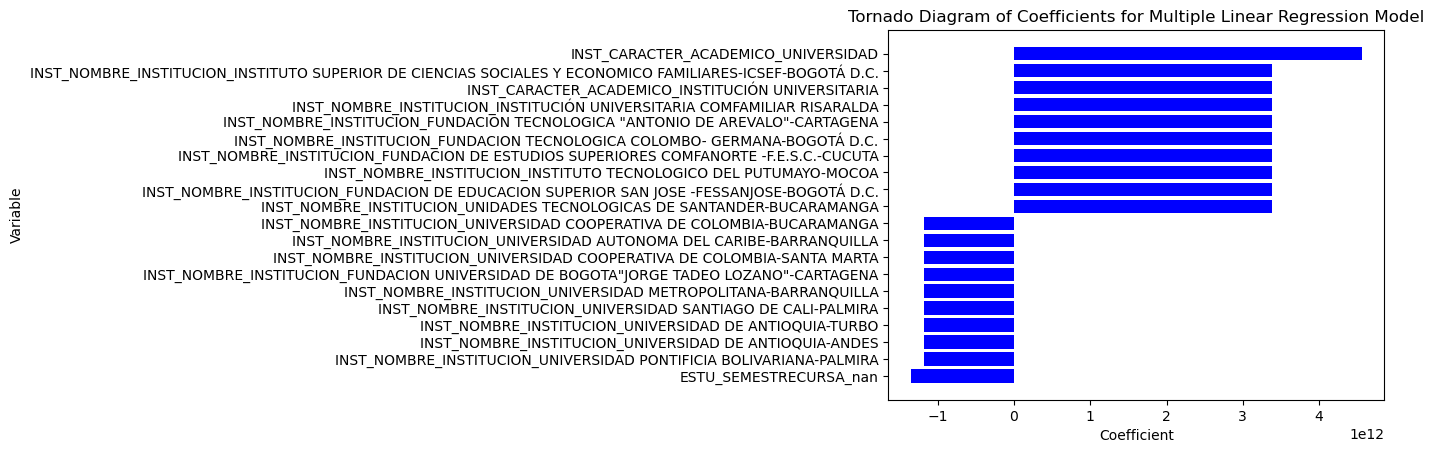

In [33]:
# Plot the tornado diagram
plt.figure()
plt.barh(variables2.Column, variables2.Coefficient, color='blue')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Tornado Diagram of Coefficients for Multiple Linear Regression Model')
plt.show()

It can be seen that the tipe of institution have great impact in the results. The students who studied in universities, tend to have better scores than the other types of institutions. 
However, looking at the metric used to see the extent in which the model is able to predict the test result, it is not good. That is why, I will use a random forest regressor to see if I can get better results.

### Random Forest regressor

In [34]:
# Define the model
Model = RandomForestRegressor(n_estimators=50,max_depth=3,n_jobs=-1)

In [35]:
# Fit to the test set
Model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=50, n_jobs=-1)

In [65]:
# Predict the target variable with the train and test set
y_train_preds = Model.predict(X_train)
y_test_preds = Model.predict(X_test)


In [66]:
# Get the MAE results for test and train
test_score = mean_absolute_error(y_test, y_test_preds)
train_score = mean_absolute_error(y_train, y_train_preds)
hiperparameters='n_estimators=50, *, criterion=absolute_error, max_depht=3, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None'

In [67]:
print(test_score)
print(train_score)

19.10386067891185
19.09141362899985


In [40]:
parameters = {'n_estimators':[50, 100,150], 'max_depth':[3,5]}

In [48]:
# Grid search
clf= GridSearchCV(RandomForestRegressor(), parameters,cv=3,n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'n_estimators': [50, 100, 150]})

In [49]:
resultados = pd.DataFrame(clf.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,49.245748,3.748393,0.262000,0.019366,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.180218,0.173764,0.175375,0.176452,0.002743,6
1,90.288561,9.810376,0.303858,0.052834,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.180441,0.173466,0.175834,0.176580,0.002896,5
2,128.060526,5.807747,0.380120,0.028008,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.180627,0.173838,0.175823,0.176763,0.002850,4
3,83.389015,12.460407,0.264626,0.042945,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.228568,0.226902,0.226505,0.227325,0.000894,2
4,139.497287,7.877609,0.303128,0.007967,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.229466,0.226488,0.226836,0.227597,0.001329,1


In [68]:
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

In [69]:
test_score = mean_absolute_error(y_test, y_test_preds)
train_score = mean_absolute_error(y_train, y_train_preds)
hiperparameters='n_estimators=100, *, criterion=absolute_error, max_depht=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None'

In [70]:
print(test_score)
print(train_score)

18.490232016004544
18.473122902488207


## Additional analysis

### Is the city where people live related to their scores?
It can be seen that there are somme places where the students live that have a strong relation with the test score. However, I will make a bar diagram to analyze which places are the top 10 and the bottom 10.

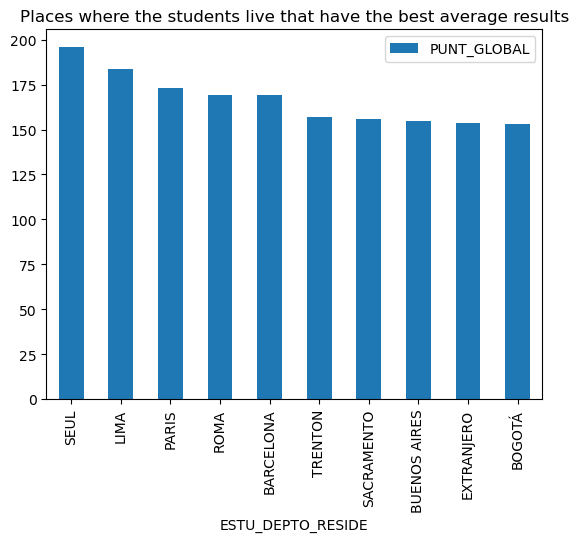

In [71]:
a=df[['ESTU_DEPTO_RESIDE','PUNT_GLOBAL']].groupby('ESTU_DEPTO_RESIDE').mean()
a.sort_values(by='PUNT_GLOBAL', ascending=False,inplace=True)
x=a.head(10).plot(kind='bar',title= "Places where the students live that have the best average results")

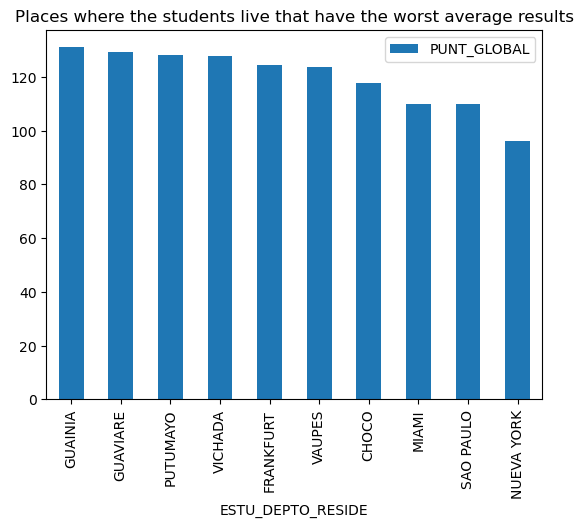

In [72]:
x=a.tail(10).plot(kind='bar',title= "Places where the students live that have the worst average results")

It can be seen that better results are obteined by students that live in Seul, Lima, Paris, Roma, Barcelona, Treton, Sacramento, Buenos Aires, Extranjero and Bogotá. And the students that had worst results live in Guainia, Guaviare, Putumayo, Vichada, Frankfurt, Vaupes, Choco, Miami, Sao Paulo and New York.

### What are the top 20 universities?
In the previous analysis, it can be seen that the university is related with higher and lower scores in the exam. However I would like to know which are the top 20 universities according to the exam results.

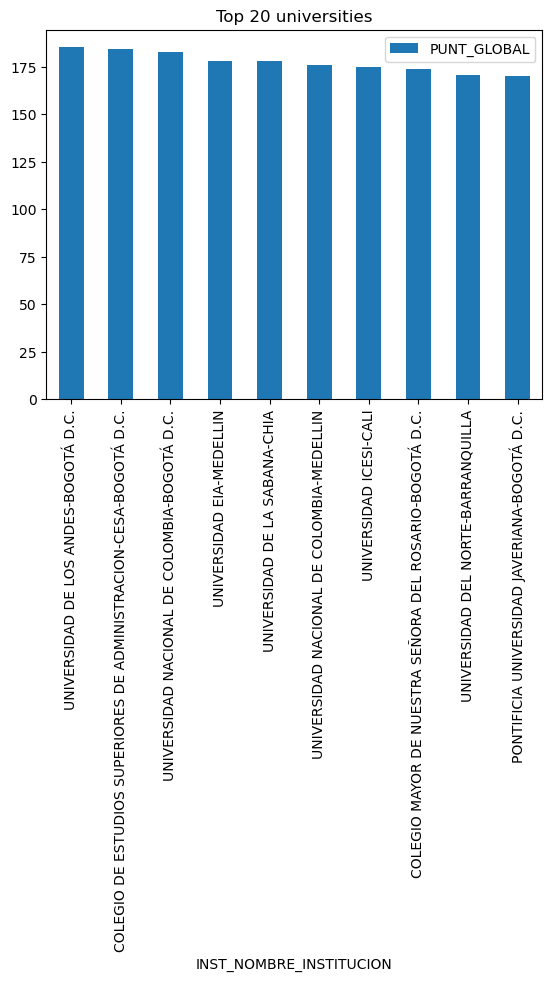

In [73]:
a=df[['INST_NOMBRE_INSTITUCION','PUNT_GLOBAL']].groupby('INST_NOMBRE_INSTITUCION').mean()
a.sort_values(by='PUNT_GLOBAL', ascending=False,inplace=True)
x=a.head(10).plot(kind='bar',title= "Top 20 universities")

The top 20 universities, based on the results are: Universidad de los Andres, CESA, Universidad Nacional de Colombia (Bogotá), Universidad EIA, Universidad de la Sabana, Universidad Nacional de Colombia (Medellín), ICESI, Colegio mayor de nuestra señora del Rosario, Univesidad del Norte and Pontificia universidad Javeriana.